# Classification of Radiative Trident Events

### Omar Moreno (Santa Cruz Institute for Particle Physics, University of California, Santa Cruz)

## Introduction

The main background of the Heavy Photon Search is the process e-W -> e-e-e+W, otherwise known as tridents.  There are two main diagrams that contribute to the trident production: Bethe-Heitler and radiatives. 

The BH background is the dominant (factor of 5) amplitude among the two processes.  However, it's different kinematics can be used to significantly reduce the number of BH.  On the other hand, the radiative reaction has identical kinematics to the A' reaction.  In turn, this allows relating the cross section of the A' to that of the radiatives as 

and is used in setting limits in mass-coupling space using using the formula

It is then of great importance to maximize the number of radiative events.

As explained above, the kinematics of the radiatives and BH are very different and there are known features which allows a significant reduction in the BH background.  One such feature is the summation of the Ecal cluster energies.

This study shows that classification of radiatives can be improved with the aid of classifiers such as ***.  

In [1]:
# This allows matplotlib plots to be shown inline
%matplotlib inline

import numpy as np
import root_numpy as rnp
import matplotlib.pyplot as plt

## Preprocessing of Signal an Background Events

The final state Trident electron-positron pair are required to be within the acceptance of both the Ecal and SVT.  This implies that both the electron and positron will leave charge depositions in the SVT which can be used to reconstruct the momentum and vertex of the particle, along with energy depositions in the Ecal used for their energy measurement. Because of the good time resolution of the Ecal, a cluster pair can be easily selected in an event.  The cluster pair can then be matched up to the two electron-positron trident tracks in the event.  

These requirements will be applied at the preprocessing level.  Specifically, the two clusters are required to be within a 1.6 ns window relative to each other while extrapolated tracks are expected to be within 2 mm of the corresponding clusters.  Events passing these cuts are then written out to a flat tuple including the following variables.  These variables will be used in training the machine learning algorithms below.

## Preprocessed Distributions

In [2]:
# Open a ROOT file and create a record array out of both the preprocessed BH and Rad ntuples
X_rad_rec = rnp.root2array("rad_preprocessed.root")
X_bh_rec = rnp.root2array("bh_preprocessed.root")

# Convert the data into an array that can be used as an input into scikit-learn
X_rad = rnp.rec2array(X_rad_rec)
X_bh = rnp.rec2array(X_bh_rec)

X_rad = X_rad[:len(X_bh)]

print "Length of Rad array: " + str(len(X_rad))
print "Shape of Rad array: " + str(X_rad.shape)
print "Length of BH array: " + str(len(X_bh))
print "Shape of BH array: " + str(X_bh.shape)

Length of Rad array: 12131
Shape of Rad array: (12131, 26)
Length of BH array: 12131
Shape of BH array: (12131, 26)


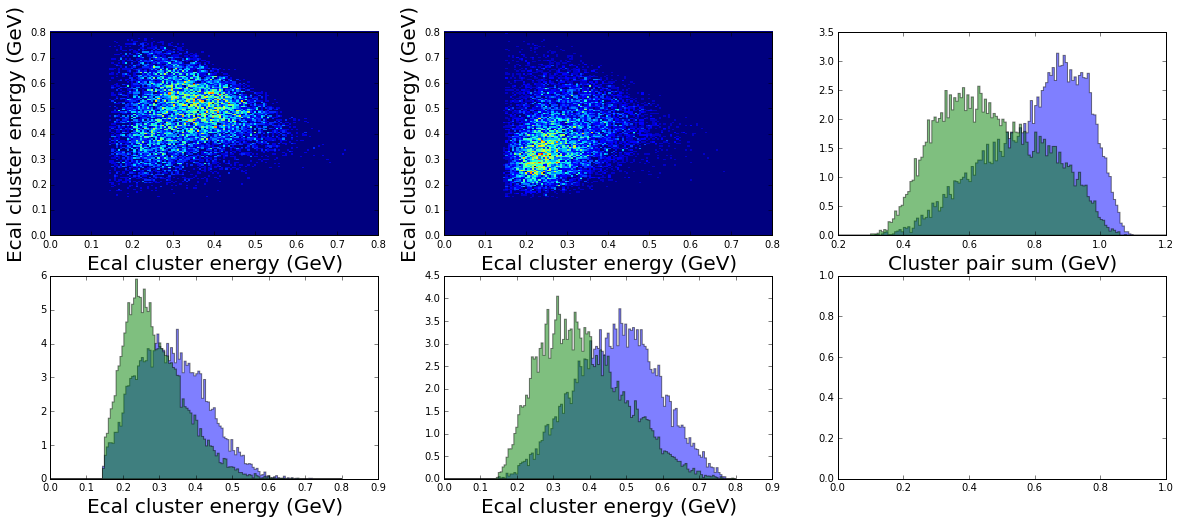

In [3]:
rad_cluster_0_energy = X_rad[:,0]
rad_cluster_1_energy = X_rad[:,1]
bh_cluster_0_energy = X_bh[:,0]
bh_cluster_1_energy = X_bh[:,1]

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

ax0.hist2d(rad_cluster_0_energy, rad_cluster_1_energy, bins=150, range=[[0, 0.8], [0, 0.8]]);
ax0.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)
ax0.set_ylabel("Ecal cluster energy (GeV)", fontsize=20)

ax1.hist2d(bh_cluster_0_energy, bh_cluster_1_energy, bins=150, range=[[0, 0.8], [0, 0.8]]);
ax1.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)
ax1.set_ylabel("Ecal cluster energy (GeV)", fontsize=20)

ax2.hist(rad_cluster_0_energy+rad_cluster_1_energy, bins=150, range=(0.2, 1.2), alpha=0.5, normed=True, histtype="stepfilled");
ax2.hist(bh_cluster_0_energy+bh_cluster_1_energy, bins=150, range=(0.2, 1.2), alpha=0.5, normed=True, histtype="stepfilled");
ax2.set_xlabel("Cluster pair sum (GeV)", fontsize=20)

ax3.hist(rad_cluster_0_energy, bins=150, range=(0, 0.8), alpha=0.5, normed=True, histtype="stepfilled")
ax3.hist(bh_cluster_0_energy, bins=150, range=(0, 0.8), alpha=0.5, normed=True, histtype="stepfilled")
ax3.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)

ax4.hist(rad_cluster_1_energy, bins=150, range=(0, 0.8), alpha=0.5, normed=True, histtype="stepfilled")
ax4.hist(bh_cluster_1_energy, bins=150, range=(0, 0.8), alpha=0.5, normed=True, histtype="stepfilled")
ax4.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)

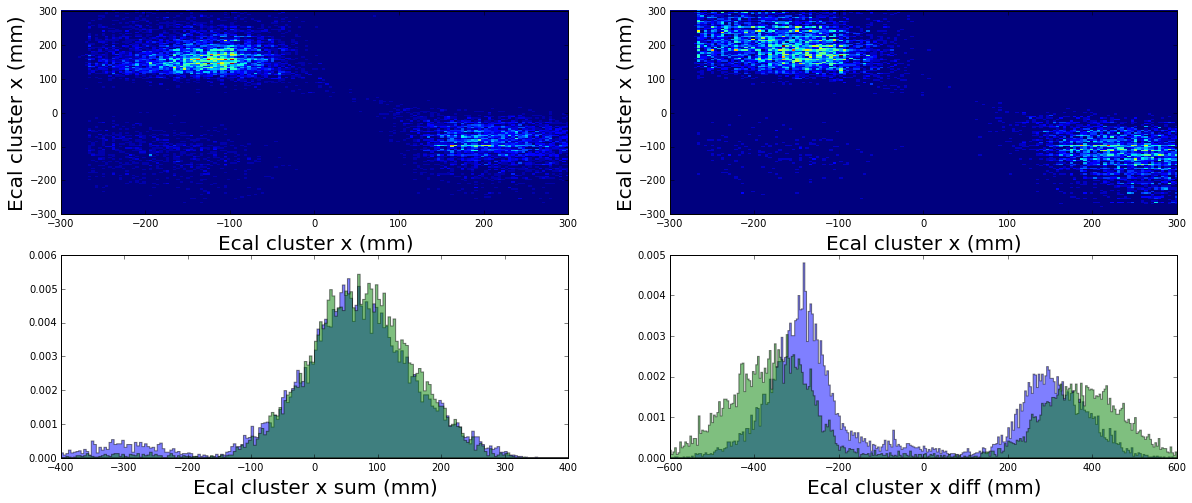

In [15]:
rad_cluster_0_x = X_rad[:,2]
rad_cluster_1_x = X_rad[:,3]
bh_cluster_0_x = X_bh[:,2]
bh_cluster_1_x = X_bh[:,3]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
ax0.hist2d(rad_cluster_0_x, rad_cluster_1_x, bins=150, range=[[-300, 300], [-300, 300]])
ax0.set_xlabel("Ecal cluster x (mm)", fontsize=20)
ax0.set_ylabel("Ecal cluster x (mm)", fontsize=20)

ax1.hist2d(bh_cluster_0_x, bh_cluster_1_x, bins=150, range=[[-300, 300], [-300, 300]])
ax1.set_xlabel("Ecal cluster x (mm)", fontsize=20)
ax1.set_ylabel("Ecal cluster x (mm)", fontsize=20)

ax2.hist(rad_cluster_0_x + rad_cluster_1_x, bins=200, range=(-400, 400), alpha=0.5, normed=True, histtype="stepfilled")
ax2.hist(bh_cluster_0_x + bh_cluster_1_x, bins=200, range=(-400, 400), alpha=0.5, normed=True, histtype="stepfilled");
ax2.set_xlabel("Ecal cluster x sum (mm)", fontsize=20)

ax3.hist(rad_cluster_0_x - rad_cluster_1_x, bins=300, range=(-600, 600), alpha=0.5, normed=True, histtype="stepfilled")
ax3.hist(bh_cluster_0_x - bh_cluster_1_x, bins=300, range=(-600, 600), alpha=0.5, normed=True, histtype="stepfilled")
ax3.set_xlabel("Ecal cluster x diff (mm)", fontsize=20)

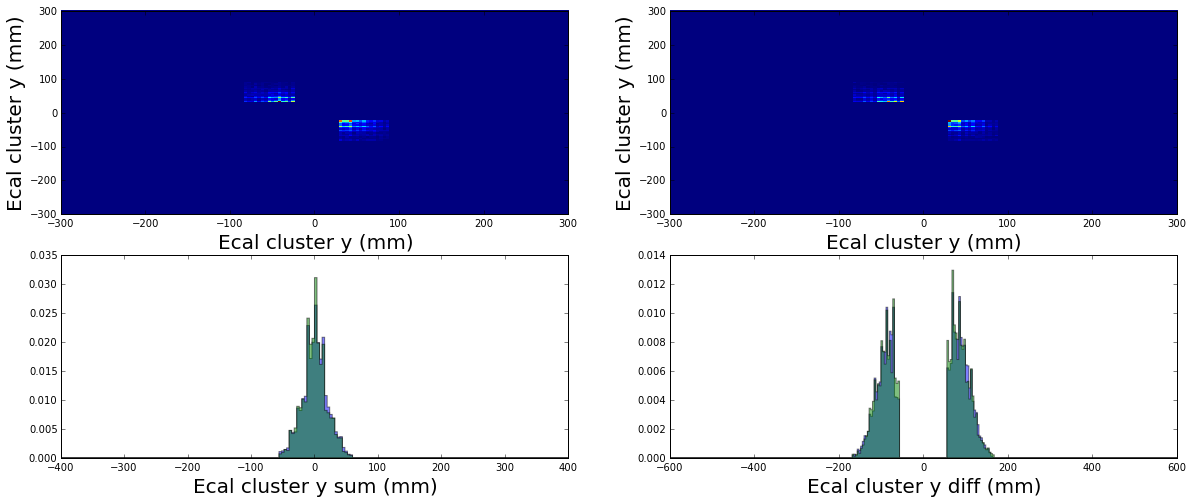

In [16]:
rad_cluster_0_y = X_rad[:,4]
rad_cluster_1_y = X_rad[:,5]
bh_cluster_0_y = X_bh[:,4]
bh_cluster_1_y = X_bh[:,5]

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))
ax0.hist2d(rad_cluster_0_y, rad_cluster_1_y, bins=150, range=[[-300, 300], [-300, 300]])
ax0.set_xlabel("Ecal cluster y (mm)", fontsize=20)
ax0.set_ylabel("Ecal cluster y (mm)", fontsize=20)

ax1.hist2d(bh_cluster_0_y, bh_cluster_1_y, bins=150, range=[[-300, 300], [-300, 300]])
ax1.set_xlabel("Ecal cluster y (mm)", fontsize=20)
ax1.set_ylabel("Ecal cluster y (mm)", fontsize=20)

ax2.hist(rad_cluster_0_y + rad_cluster_1_y, bins=200, range=(-400, 400), alpha=0.5, normed=True, histtype="stepfilled")
ax2.hist(bh_cluster_0_y + bh_cluster_1_y, bins=200, range=(-400, 400), alpha=0.5, normed=True, histtype="stepfilled");
ax2.set_xlabel("Ecal cluster y sum (mm)", fontsize=20)

ax3.hist(rad_cluster_0_y - rad_cluster_1_y, bins=300, range=(-600, 600), alpha=0.5, normed=True, histtype="stepfilled")
ax3.hist(bh_cluster_0_y - bh_cluster_1_y, bins=300, range=(-600, 600), alpha=0.5, normed=True, histtype="stepfilled")
ax3.set_xlabel("Ecal cluster y diff (mm)", fontsize=20)

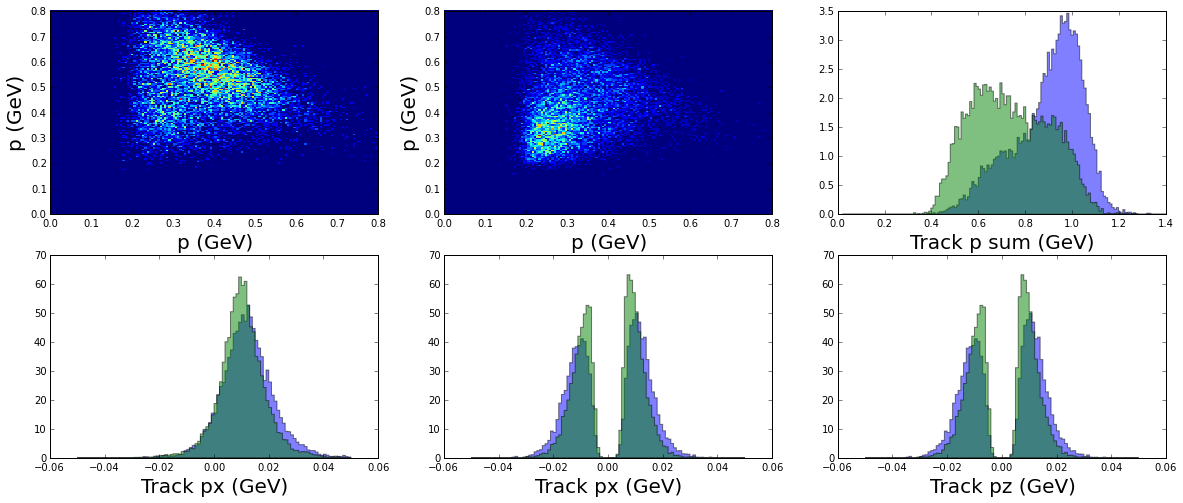

In [27]:
rad_track_0_p = X_rad[:,6]
rad_track_0_px = X_rad[:,7]
rad_track_0_py = X_rad[:,8]
rad_track_0_pz = X_rad[:,9]
rad_track_1_p = X_rad[:,16]
rad_track_1_px = X_rad[:,17]
rad_track_1_py = X_rad[:,18]
rad_track_1_pz = X_rad[:,19]

bh_track_0_p = X_bh[:,6]
bh_track_0_px = X_bh[:,7]
bh_track_0_py = X_bh[:,8]
bh_track_0_pz = X_bh[:,9]
bh_track_1_p = X_bh[:,16]
bh_track_1_px = X_bh[:,17]
bh_track_1_py = X_bh[:,18]
bh_track_1_pz = X_bh[:,19]

fig, ((ax0, ax1, ax2), (ax3, ax4, ax5)) = plt.subplots(nrows=2, ncols=3, figsize=(20,8))

ax0.hist2d(rad_track_0_p, rad_track_1_p, bins=150, range=[[0, 0.8], [0, 0.8]])
ax0.set_xlabel("p (GeV)", fontsize=20)
ax0.set_ylabel("p (GeV)", fontsize=20)

ax1.hist2d(bh_track_0_p, bh_track_1_p, bins=150, range=[[0, 0.8], [0, 0.8]])
ax1.set_xlabel("p (GeV)", fontsize=20)
ax1.set_ylabel("p (GeV)", fontsize=20)

ax2.hist(rad_track_0_p + rad_track_1_p, bins=150, range=(0.02, 1.4), alpha=0.5, normed=True, histtype="stepfilled")
ax2.hist(bh_track_0_p + bh_track_1_p, bins=150, range=(0.02, 1.4), alpha=0.5, normed=True, histtype="stepfilled")
ax2.set_xlabel("Track p sum (GeV)", fontsize=20)

ax3.hist(rad_track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax3.hist(bh_track_0_px, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax3.set_xlabel("Track px (GeV)", fontsize=20)

ax4.hist(rad_track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax4.hist(bh_track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax4.set_xlabel("Track px (GeV)", fontsize=20)

ax5.hist(rad_track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax5.hist(bh_track_0_py, bins=100, range=(-0.05, 0.05), alpha=0.5, normed=True, histtype="stepfilled");
ax5.set_xlabel("Track pz (GeV)", fontsize=20)


In [6]:
y_rad = np.ones(len(X_rad))
y_bh = np.zeros(len(X_bh))

rad_zip = zip(X_rad, y_rad)
bh_zip = zip(X_bh, y_bh)

X_merge = np.concatenate((rad_zip, bh_zip))
np.random.shuffle(X_merge)

X_list, y_list = map(list, zip(*X_merge))

X = np.array(X_list)
print "Shape of X: " + str(X.shape)

y = np.array(y_list)
print "Shape of y: " + str(y.shape)

Shape of X: (24262, 26)
Shape of y: (24262,)


In [7]:
from sklearn import cross_validation
from sklearn import metrics

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

## Decision Tree

In [8]:
from sklearn import tree
tree_clf = tree.DecisionTreeClassifier(max_depth=10)

In [9]:
predictions = tree_clf.fit(X_train, y_train).predict(X_test)

print metrics.classification_report(y_test, predictions, target_names=['radiative', 'Bethe-Heitler'])

               precision    recall  f1-score   support

    radiative       0.69      0.68      0.69      6062
Bethe-Heitler       0.69      0.69      0.69      6069

  avg / total       0.69      0.69      0.69     12131



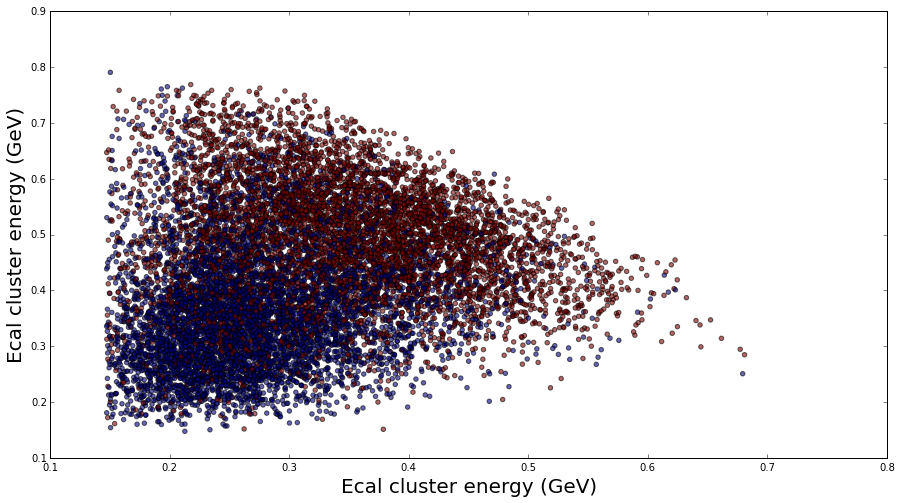

In [11]:
fig, ax0 = plt.subplots(figsize=(15, 8))

ax0.scatter(X_test[:,0], X_test[:,1], c=predictions, alpha=0.6)
ax0.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)
ax0.set_ylabel("Ecal cluster energy (GeV)", fontsize=20)

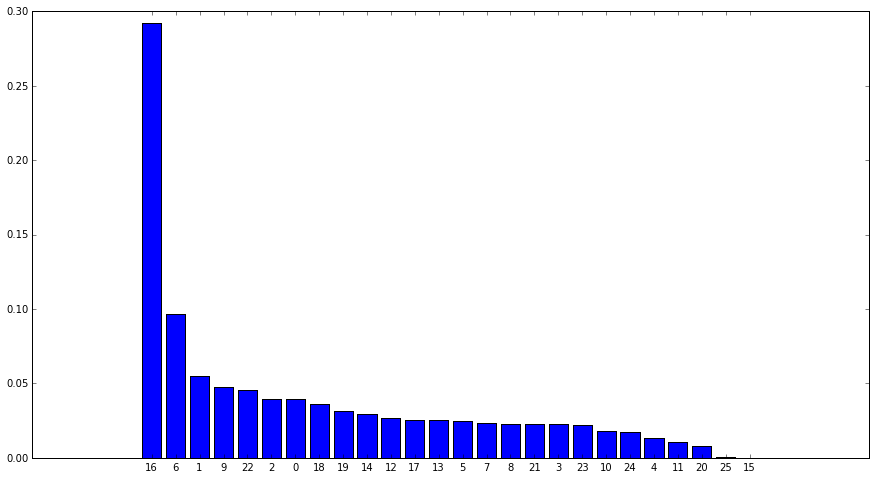

In [12]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1]
fig, ax0 = plt.subplots(figsize=(15, 8))

ax0.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), indices);

[[4152 1910]
 [1900 4169]]


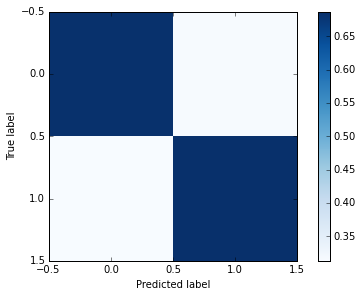

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print cm
cmap=plt.cm.Blues
plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=200)

In [40]:
predictions = forest_clf.fit(X_train, y_train).predict(X_test)

print metrics.classification_report(y_test, predictions, target_names=['radiative', 'Bethe-Heitler'])

               precision    recall  f1-score   support

    radiative       0.75      0.69      0.72      6062
Bethe-Heitler       0.71      0.77      0.74      6069

  avg / total       0.73      0.73      0.73     12131



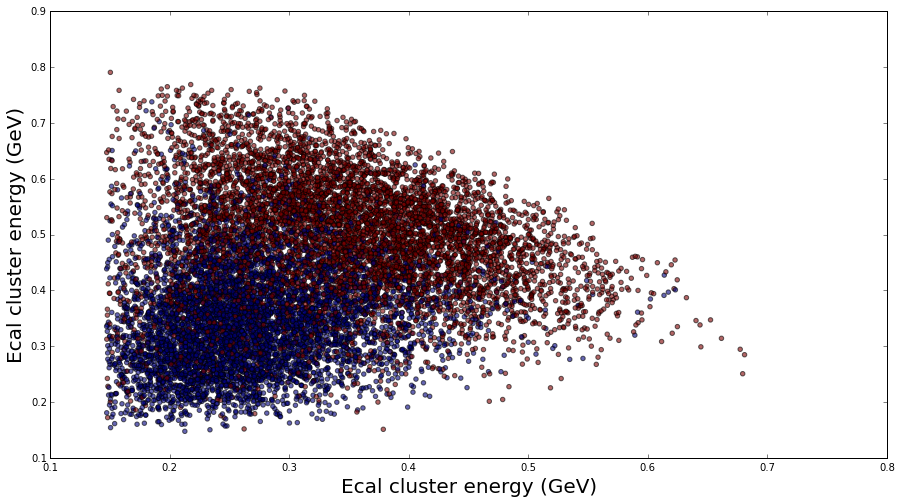

In [41]:
fig, ax0 = plt.subplots(figsize=(15, 8))

ax0.scatter(X_test[:,0], X_test[:,1], c=predictions, alpha=0.6)
ax0.set_xlabel("Ecal cluster energy (GeV)", fontsize=20)
ax0.set_ylabel("Ecal cluster energy (GeV)", fontsize=20)

[[4159 1903]
 [1379 4690]]


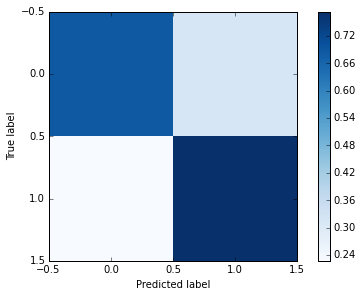

In [42]:
cm = metrics.confusion_matrix(y_test, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print cm
cmap=plt.cm.Blues
plt.imshow(cm_normalized, interpolation='nearest', cmap=cmap)
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Support Vector Machine

In [43]:
from sklearn import svm

svm_lin_clf = svm.LinearSVC()